In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from sklearn.cluster import KMeans

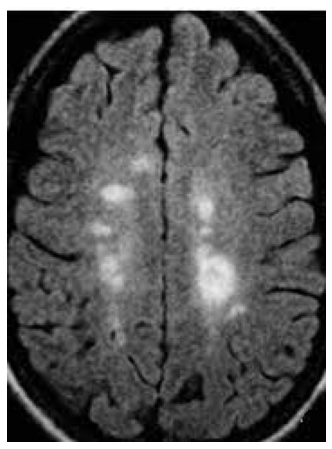

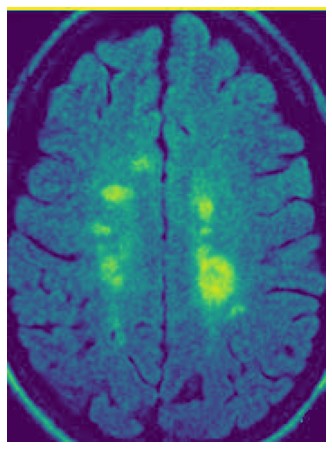

ValueError: 'grey' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

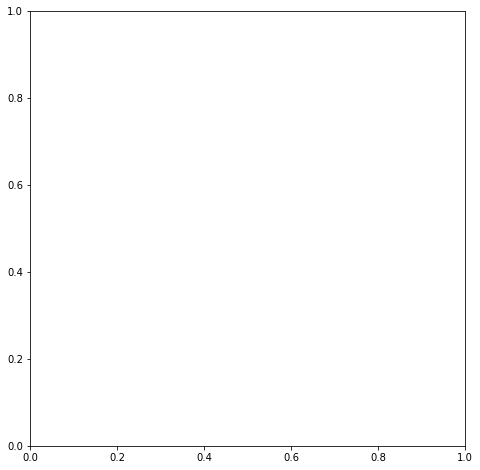

In [5]:
def list_same_colors(Foto, Foto2):
    Foto
    I = Image.open(Foto)
    # I = Image.open("img_Esclerosis_1.jfif")
#     I = Image.open("img_Esclerosis_2.jfif")
    # I = Image.open("img_Esclerosis_3.jpg")
    # I = Image.open("img_Esclerosis_4.jpg")
    # I = Image.open("img_Sano_1.jpg")
    # I = Image.open("img_Epilepsia.jpeg")
    # I = Image.open("img_Lesion-Hipoxico-isquemica-aguda_Niños.jpg")
    # I = Image.open("img_Sano_2.jpg")
    # I = Image.open("img_SHunter.jpg")
    # I = Image.open("imgcolor_2.gif")

    plt.figure(figsize=(8,8))
    plt.imshow(I)
    plt.axis('off')
    plt.show()
    # ******************

    I1 = I.convert('L')
    I2 = np.asarray(I1,dtype=np.float)

    plt.figure(figsize=(8,8))
    plt.imshow(I2,cmap=None)
    plt.axis('off')
    plt.show()
    # ******************

    X = I2.reshape((-1, 1))
    # # ******************

    k_means = KMeans(n_clusters=3)
    k_means.fit(X) 
    # # ******************

    centroides = k_means.cluster_centers_
    etiquetas = k_means.labels_
    # # ******************

    I2_compressed = np.choose(etiquetas, centroides)
    I2_compressed.shape = I2.shape
    # # ******************

    plt.figure(figsize=(8,8))
    plt.imshow(I2_compressed,cmap=None)
    plt.axis('off')
    plt.show()
    # ******************

    I2 = (I2-np.min(I2))/(np.max(I2)-np.min(I2))*255
    I2 = Image.fromarray(I2.astype(np.uint8))
    w, h =I2.size
    I2 = I2.convert('RGB')
    colors = I2.getcolors(w * h)
    # print (colors)
    # # ******************

    
    
#     BLOQUE FOTO2 SIN RUIDO

    Foto2
    I1_2 = Image.open(Foto2)
    
    plt.figure(figsize=(8,8))
    plt.imshow(I1_2)
    plt.axis('off')
    plt.show()
    
    I1_2 = I1_2.convert('L')
    I2_2 = np.asarray(I1_2,dtype=np.float)

    plt.figure(figsize=(8,8))
    plt.imshow(I2_2,cmap=None)
    plt.axis('off')
    plt.show()
    
    I2_2 = (I2_2-np.min(I2_2))/(np.max(I2_2)-np.min(I2_2))*255
    I2_2 = Image.fromarray(I2_2.astype(np.uint8))
    w, h =I2_2.size
    I2_2 = I2_2.convert('RGB')
    colors_2 = I2_2.getcolors(w * h)
# FIN BLOQUE FOTO2



    list_same = []
    for same in colors:
        if same in colors_2:
            list_same.append(same)
    print(list_same)
    
    return list_same

result_same = list_same_colors("media/mriddbbs/img_Esclerosis_1.jfif", "media/mriddbbs/img_Esclerosis_2.jfif")
result_same_2 = list_same_colors("media/mriddbbs/img_Esclerosis_3.jpg", "media/mriddbbs/img_SHunter.jpg")

list_prueba = []
for prueba in result_same:
    if prueba in result_same_2:
        list_prueba.append(prueba)

print(list_prueba)

# result_same_3 = list_same_colors("img_Sano_1.jpg","img_sano_2.jpg")
# result_same_4 = list_same_colors("img_Epilepsia.jpeg","img_SHunter.jpg")

# list_prueba_2 = []
# for prueba_2 in result_same_3:
#     if prueba_2 in result_same_4:
#         list_prueba_2.append(prueba_2)
        
# print(list_prueba_2)